<a href="https://colab.research.google.com/github/dave0629g/simpleMLP/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import keras
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [45]:
from keras.datasets.mnist import load_data
((x_train, y_train), (x_test,y_test)) = load_data()

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


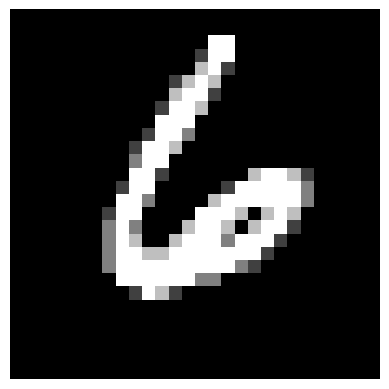

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

c = random.randint(0, x_train.shape[0]-1)
plt.axis('off')
plt.imshow(x_train[c],cmap='gray')
pd.DataFrame(x_train[c])

In [48]:
# 資料預處理
# 1. Normalize (suitable for keras's default weights)
#   1.1 0-1 sigmoid
#   1.2 -1 - 1
#   Flatten for MLP  
x_train_flatten_normal = x_train.reshape(60000,784) /255
x_test_flatten_normal = x_test.reshape(10000,784) /255
# x_train_flatten_normal[0]

In [49]:
# 2. 答案預處理(One-Hot encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [50]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(128,activation='relu',input_dim=784))
mlp.add(Dense(10,activation='softmax'))
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 確定模型的訓練方式
# 隨機梯度下降
# loss: 最後輸出一個 binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下陳的時候優化 => 基於動量
mlp.compile(loss='categorical_crossentropy',      metrics=["accuracy"],      optimizer='adam')

In [52]:
mlp.fit(x_train_flatten_normal,
    y_train_cat,
    batch_size=200,
    epochs=15,
    validation_split=0.1,
    verbose=1)

Epoch 1/15
270/270 [==============================] - 2s 7ms/step - loss: 0.4409 - accuracy: 0.8795 - val_loss: 0.1890 - val_accuracy: 0.9505
Epoch 2/15
270/270 [==============================] - 2s 6ms/step - loss: 0.1993 - accuracy: 0.9436 - val_loss: 0.1369 - val_accuracy: 0.9642
Epoch 3/15
270/270 [==============================] - 3s 12ms/step - loss: 0.1477 - accuracy: 0.9584 - val_loss: 0.1151 - val_accuracy: 0.9690
Epoch 4/15
270/270 [==============================] - 3s 12ms/step - loss: 0.1160 - accuracy: 0.9668 - val_loss: 0.1032 - val_accuracy: 0.9700
Epoch 5/15
270/270 [==============================] - 3s 10ms/step - loss: 0.0940 - accuracy: 0.9732 - val_loss: 0.0957 - val_accuracy: 0.9718
Epoch 6/15
270/270 [==============================] - 3s 11ms/step - loss: 0.0788 - accuracy: 0.9779 - val_loss: 0.0887 - val_accuracy: 0.9750
Epoch 7/15
270/270 [==============================] - 4s 13ms/step - loss: 0.0667 - accuracy: 0.9808 - val_loss: 0.0815 - val_accuracy: 0.9763
E

In [53]:
mlp.evaluate(x_test_flatten_normal, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9773


[0.07304804027080536, 0.9772999882698059]

In [74]:
import numpy as np
predict_x=mlp.predict(x_test_flatten_normal) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [75]:
classes_x

array([7, 2, 1, ..., 4, 5, 6])

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classes_x)


array([[ 968,    0,    1,    2,    1,    1,    2,    1,    2,    2],
       [   0, 1125,    3,    1,    0,    1,    1,    0,    4,    0],
       [   3,    2, 1005,    3,    3,    1,    2,    8,    5,    0],
       [   0,    0,    2,  997,    0,    2,    0,    4,    2,    3],
       [   0,    0,    3,    1,  958,    0,    4,    2,    2,   12],
       [   2,    0,    0,   11,    2,  869,    3,    0,    4,    1],
       [   7,    3,    2,    1,    3,    5,  933,    0,    4,    0],
       [   1,    5,    8,    5,    1,    0,    0,  999,    2,    7],
       [   4,    0,    3,    7,    5,    3,    1,    3,  945,    3],
       [   2,    4,    0,    9,    7,    4,    0,    6,    3,  974]])

In [77]:
a=confusion_matrix(y_test, classes_x)


In [78]:
pd.DataFrame(confusion_matrix(y_test, classes_x))

,0,1,2,3,4,5,6,7,8,9
0,968,0,1,2,1,1,2,1,2,2
1,0,1125,3,1,0,1,1,0,4,0
2,3,2,1005,3,3,1,2,8,5,0
3,0,0,2,997,0,2,0,4,2,3
4,0,0,3,1,958,0,4,2,2,12
5,2,0,0,11,2,869,3,0,4,1
6,7,3,2,1,3,5,933,0,4,0
7,1,5,8,5,1,0,0,999,2,7
8,4,0,3,7,5,3,1,3,945,3
9,2,4,0,9,7,4,0,6,3,974


In [79]:
np.nonzero(classes_x!=y_test)

(array([ 104,  115,  247,  321,  340,  404,  445,  448,  495,  578,  582,
         619,  659,  684,  691,  707,  720,  726,  947,  951,  956,  965,
        1003, 1014, 1039, 1112, 1181, 1182, 1226, 1232, 1242, 1247, 1260,
        1319, 1328, 1393, 1500, 1522, 1530, 1549, 1553, 1609, 1670, 1681,
        1709, 1717, 1790, 1800, 1878, 1901, 1903, 1952, 1982, 1987, 2004,
        2016, 2024, 2035, 2040, 2043, 2053, 2098, 2109, 2118, 2130, 2135,
        2182, 2189, 2224, 2272, 2293, 2369, 2387, 2406, 2414, 2454, 2488,
        2607, 2618, 2648, 2654, 2877, 2896, 2915, 2921, 2939, 3030, 3060,
        3073, 3117, 3289, 3422, 3441, 3490, 3503, 3520, 3558, 3559, 3597,
        3681, 3718, 3749, 3751, 3757, 3780, 3811, 3818, 3838, 3853, 3902,
        3906, 3926, 3941, 3943, 3976, 4007, 4063, 4065, 4078, 4140, 4163,
        4176, 4199, 4224, 4248, 4289, 4294, 4360, 4369, 4419, 4425, 4433,
        4437, 4439, 4497, 4504, 4534, 4536, 4567, 4571, 4601, 4751, 4761,
        4807, 4814, 4823, 4860, 4876, 

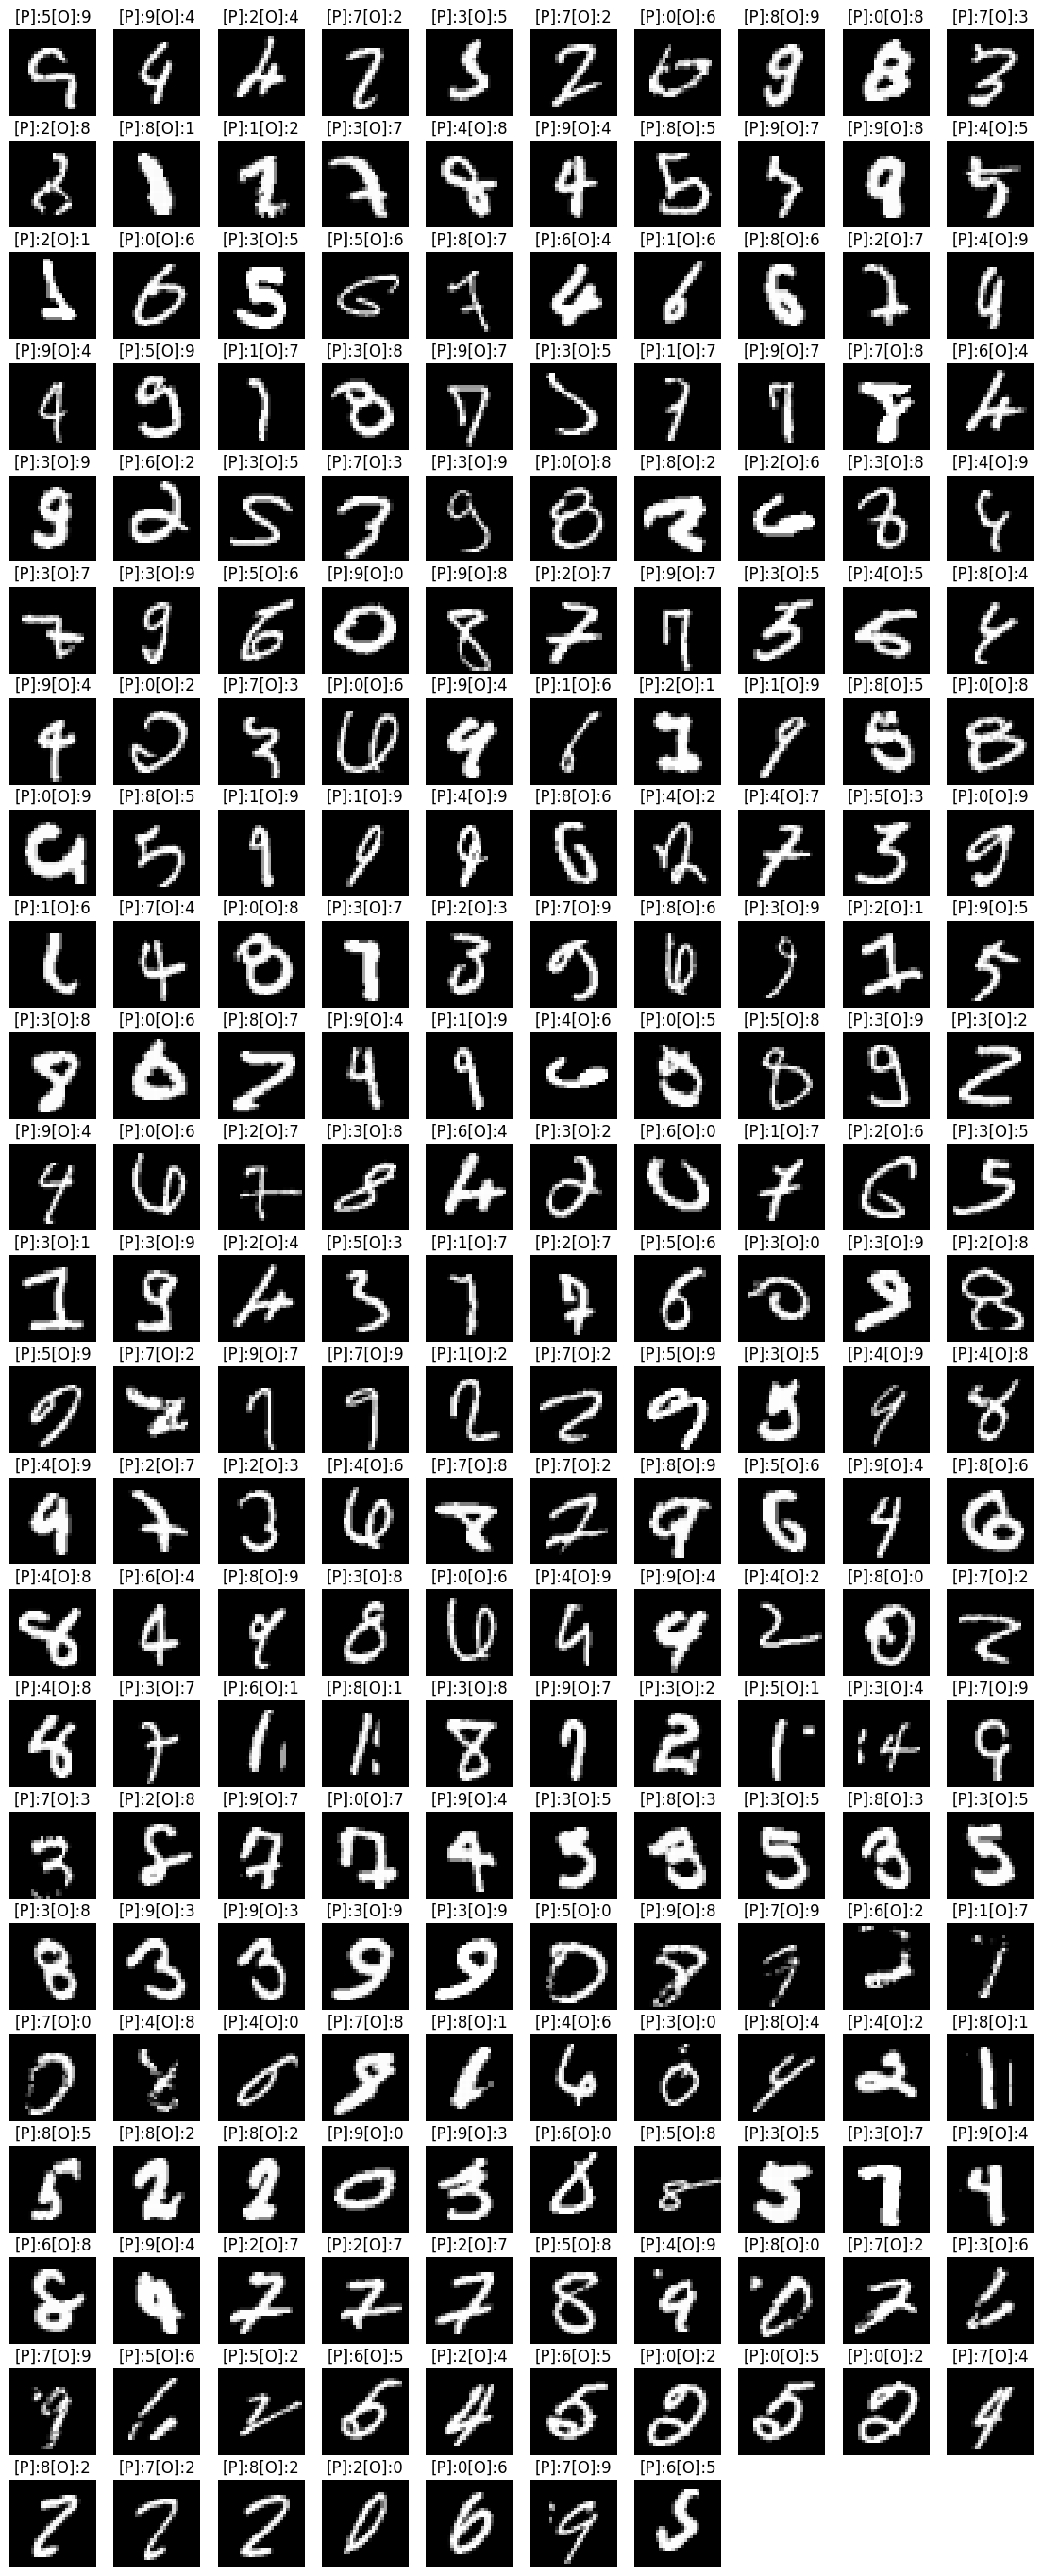

In [81]:
diff = np.nonzero(classes_x!=y_test)[0]
orifalse = y_test[diff]
classes_xfalse = classes_x[diff]
imgfalse = x_test[diff]
plt.figure(figsize=[14,35])
width = 10
height = int(len(imgfalse)/10)+1
for (i, img) in enumerate(imgfalse):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "[P]:" + str(classes_xfalse[i]) + "[O]:" + str(orifalse[i])
  plt.title(t)
  plt.imshow(img,cmap='gray')